# SciPy - Library of scientific algorithms for Python

## Introduction

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.

## Linear algebra

The linear algebra module contains a lot of matrix related functions, including linear equation solving, eigenvalue solvers, matrix functions (for example matrix-exponentiation), a number of different decompositions (SVD, LU, cholesky), etc. 

Detailed documetation is available at: http://docs.scipy.org/doc/scipy/reference/linalg.html

Here we will look at how to use some of these functions:



#### Linear equation systems

Linear equation systems on the matrix form

$A x = b$

where $A$ is a matrix and $x,b$ are vectors can be solved like:

In [1]:
import numpy as np
import scipy as sp
import scipy.linalg

In [2]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
b = np.array([1,2,3])

In [3]:
x = sp.linalg.solve(A, b)
x

array([-0.33333333,  0.66666667,  0.        ])

In [4]:
# check
sp.dot(A, x) - b

array([  0.00000000e+00,  -2.22044605e-16,   0.00000000e+00])

We can also do the same with:

$A X = B$

where $A, B, X$ are matrices:

In [5]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)

In [6]:
X = sp.linalg.solve(A, B)

In [7]:
X

array([[-0.40540595,  0.55167667,  1.46394344],
       [-0.63845802,  1.96354459,  1.84471265],
       [ 5.61480721, -4.89029856, -4.84118877]])

In [9]:
# check
sp.linalg.norm(np.dot(A, X) - B)

2.0014830212433605e-16

#### Eigenvalues and eigenvectors

The eigenvalue problem for a matrix $A$:

$\displaystyle A v_n = \lambda_n v_n$

where $v_n$ is the $n$th eigenvector and $\lambda_n$ is the $n$th eigenvalue.

To calculate eigenvalues of a matrix, use the `eigvals` and for calculating both eigenvalues and eigenvectors, use the function `eig`:

In [10]:
evals = sp.linalg.eigvals(A)

In [11]:
evals

array([-0.32883328+0.j,  0.77630181+0.j,  0.20393675+0.j])

In [12]:
evals, evecs = sp.linalg.eig(A)

In [13]:
evals

array([-0.32883328+0.j,  0.77630181+0.j,  0.20393675+0.j])

In [14]:
evecs

array([[-0.48910727,  0.55842336,  0.13827013],
       [-0.04155506,  0.2150858 , -0.21849911],
       [ 0.87123318,  0.80118752,  0.96599146]])

#### Matrix operations

In [15]:
# the matrix inverse
sp.linalg.inv(A)

array([[ -1.03345324,   1.5533192 ,   1.20114887],
       [ -0.80623922,   3.8440982 ,  -0.12421994],
       [  7.34187362, -15.52948959,   0.33994012]])

In [16]:
# determinant
sp.linalg.det(A)

-0.05205972397464949

In [18]:
# norms of various orders
sp.linalg.norm(A, ord=2), sp.linalg.norm(A, ord=np.inf)

(1.2051546690739268, 1.2813908002301786)

## Exercise

Use Scipy's linear algebra tools to compute the value of x, y, and z:

   $$2x + 3y - z = 5$$
   $$3x - 2y + 4z = 6$$
   $$-x + 2y -z = 12$$

**Hint:** remember how a linear system of equations can be turned into a matrix expression?
There are several ways of doing this within SciPy.

### Solution

## Interpolation

Interpolation is simple and convenient in scipy: The `interp1d` function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:

In [22]:
import scipy.interpolate

In [25]:
def f(x):
    return np.sin(x)

In [40]:
n = np.arange(0, 10)  
x = np.linspace(0, 9, 100)

y_meas = f(n) + 0.1 * np.random.randn(len(n)) # simulate measurement with noise
y_real = f(x)

linear_interpolation = sp.interpolate.interp1d(n, y_meas, kind="linear")
y_interp1 = linear_interpolation(x)

cubic_interpolation = sp.interpolate.interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

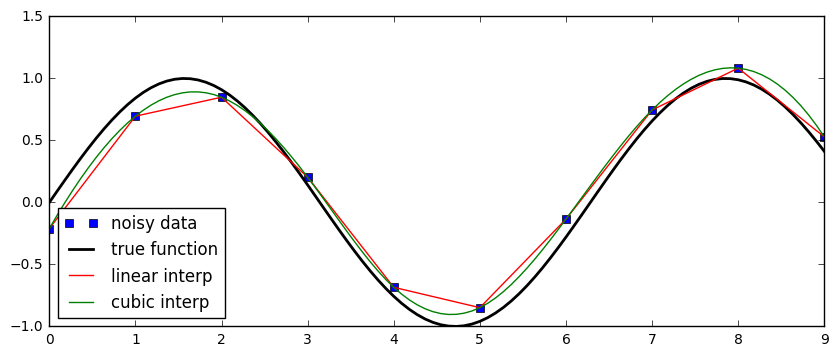

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);

## Exercise

Compute an estimator of which interpolation gives the best approximation to the noisy data.

### Solution

## Further reading

* http://www.scipy.org - The official web page for the SciPy project.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - A tutorial on how to get started using SciPy. 
* http://www.scipy-lectures.org/ - The SciPy Lecture Notes (highly recommended).